# Boston Housing Dataset


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.jpg" width=1000>

The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

MEDV = PRICE median value of owner-occupied homes in $1000s

** PRICE is the TARGET variable **

In [1]:
# crim nessuno vuole vivere nei ghetti dei criminali
# varialtri parametri
# DIS distanza dalle prime fabbriche
# RAD distanza da superstrada
# numero insegnanti elevato
# BLACK numero dei neri (controverso) stato tolto

__plot__=False # per alleggerire il NB

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

def split_dataset(corr_value , target:str = 'PRICE' ):
    X = corr_value.drop(columns=[target]) # is a Matrix
    y = corr_value[target]
    print(X.head(preview_window))
    return X,y


def correlation_plot(df):
    print("Correlation analisys")
    corrmat = df.corr()
    plt.figure(figsize = (12, 10))
    sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});
    plt.show()
    print(corrmat.index.values)
    print(df.columns.T)
    return corrmat

def get_correlated_feature(df, corrdata, threshold):
    """Toglie variabili sotto soglia"""
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    corr_value = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    print(corr_value.T)
    print(corr_value.index.values)
    corr_value = df[corr_value.index]
    print(corr_value.head(preview_window))
    print(corr_value.shape)
    if __plot__:
        sns.pairplot(corr_value)
        plt.tight_layout()
        plt.show()

    # iniziamo a vedere gli outlier per capire se il dominio ha senso
    _ = correlation_plot(corr_value)
    
    return corr_value


def plot_45_correlated_data():
    """It works only on 0.45 threshold for fixed dimensions"""
    rows = 3
    cols = 2
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

    col = df.columns
    index = 0

    for i in range(rows):
        for j in range(cols):
            sns.regplot(x = df[col[index]], y = df['PRICE'], ax = ax[i][j])
            index = index + 1
    fig.tight_layout()

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['PRICE'], axis = 1)
    y = corr_data['PRICE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test


total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []


def verifica_metriche(y_test,y_pred):

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

    print(f'R2 score {r2}')
    print(f'MSE score {mse}')
    print(f'MAE score {mae}')
    print(f'RMSE score {rmse}') # Alto perchè il nostro modello sbaglia di 
                                # molto perchè abbiamo preso tutto il dataset, 
                                # forse abbiamo preso troppe variabili, anche variabili di "disturbo" 
    print('Adjusted_R2_score: ', adj_r2)
    return r2,mse,mae,rmse,adj_r2

def performance_metrics(features, th, y_true, y_pred):

    r2,mse,mae,rmse,adj_r2 = verifica_metriche(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    print('Performance Metrics')
    print(metrics_dataframe.T)
    

In [2]:
url='https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv'
path="03-boston_houses.csv"

print("preview dataset")
preview_window=2
df = pd.read_csv(path)

df.rename(columns={'MEDV': 'PRICE'}, inplace=True) #preview

preview dataset


Data preview
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  PRICE  
0  396.9   4.98   24.0  
1  396.9   9.14   21.6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    floa

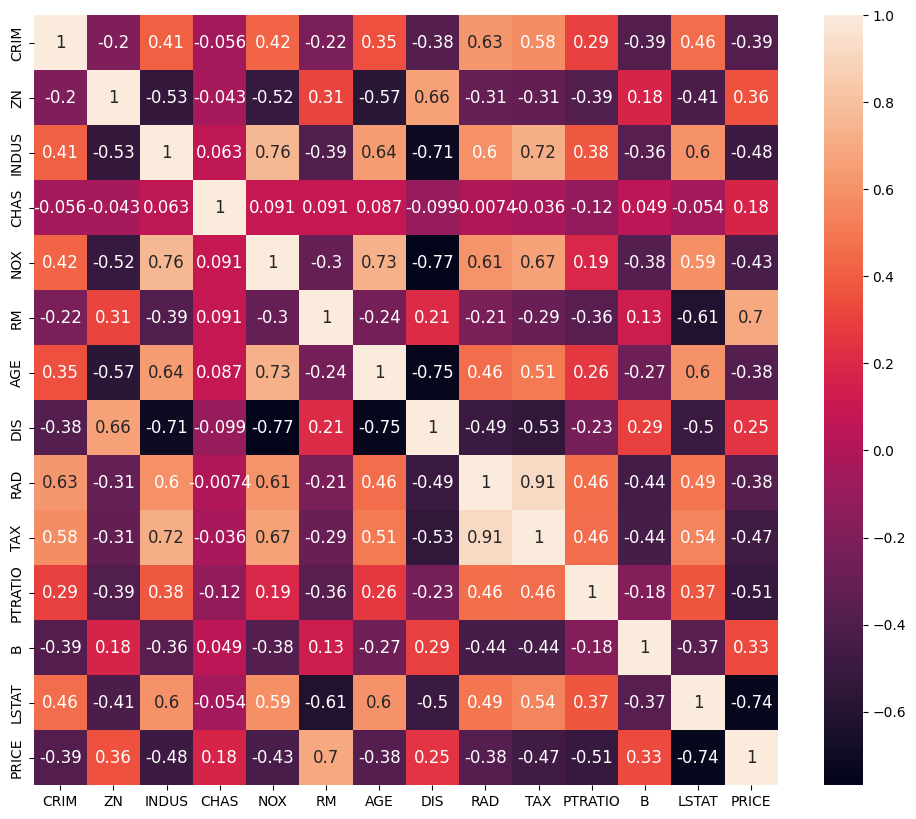

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'PRICE']
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [3]:




print("Data preview")
print(df.head(preview_window))
print(df.info())
print(df.describe().T)
print('')
print(df.isnull().sum())


if __plot__:
    print("Pairplot")
    sns.pairplot(df,hue='AGE' , height=2);
    plt.show()



corrmat = correlation_plot(df)


# Data Visualization

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

## Regressione con tutte le Features

In [4]:
## step 0 capire problema e impostare un dataset definito plottando qualche variabile
threshold=0.0 # full dataset
## STEP1 DEFINIZIONE DI INPUT E OUTPUT
print('STEP1 DEFINIZIONE DI INPUT E OUTPUT')

X,y=split_dataset(df,'PRICE')


print('STEP2 TRAIN TEST SPLIT')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667, )

print('STEP3 MODELLAZIONE')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('STEP4 PREDIZIONE')
y_pred = model.predict(X_test)

print('STEP5 VERIFICA METRICHE')
verifica_metriche(y_test,y_pred)
performance_metrics(df.columns.values, threshold, y_test, y_pred)

STEP1 DEFINIZIONE DI INPUT E OUTPUT
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  
0  396.9   4.98  
1  396.9   9.14  
STEP2 TRAIN TEST SPLIT
STEP3 MODELLAZIONE
STEP4 PREDIZIONE
STEP5 VERIFICA METRICHE
R2 score 0.6113097827490284
MSE score 34.485513964839186
MAE score 3.683772031811659
RMSE score 5.872436799561081
Adjusted_R2_score:  0.574694037645676
R2 score 0.6113097827490284
MSE score 34.485513964839186
MAE score 3.683772031811659
RMSE score 5.872436799561081
Adjusted_R2_score:  0.574694037645676
Performance Metrics
                                       features name #feature corr_value  \
0  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' '...       13        0.0   

     R2 R2_adjusted   MAE    MSE  RMSE  
0  0.61        0.57  3.68  34.49  5.87  


### Feature Selection with correlation

### Let's find out other combination of columns to get better accuracy  > 0.35

               INDUS       NOX       RM       TAX   PTRATIO     LSTAT  PRICE
Corr Value -0.483725 -0.427321  0.69536 -0.468536 -0.507787 -0.737663    1.0
['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'PRICE']
   INDUS    NOX     RM  TAX  PTRATIO  LSTAT  PRICE
0   2.31  0.538  6.575  296     15.3   4.98   24.0
1   7.07  0.469  6.421  242     17.8   9.14   21.6
(506, 7)
Correlation analisys


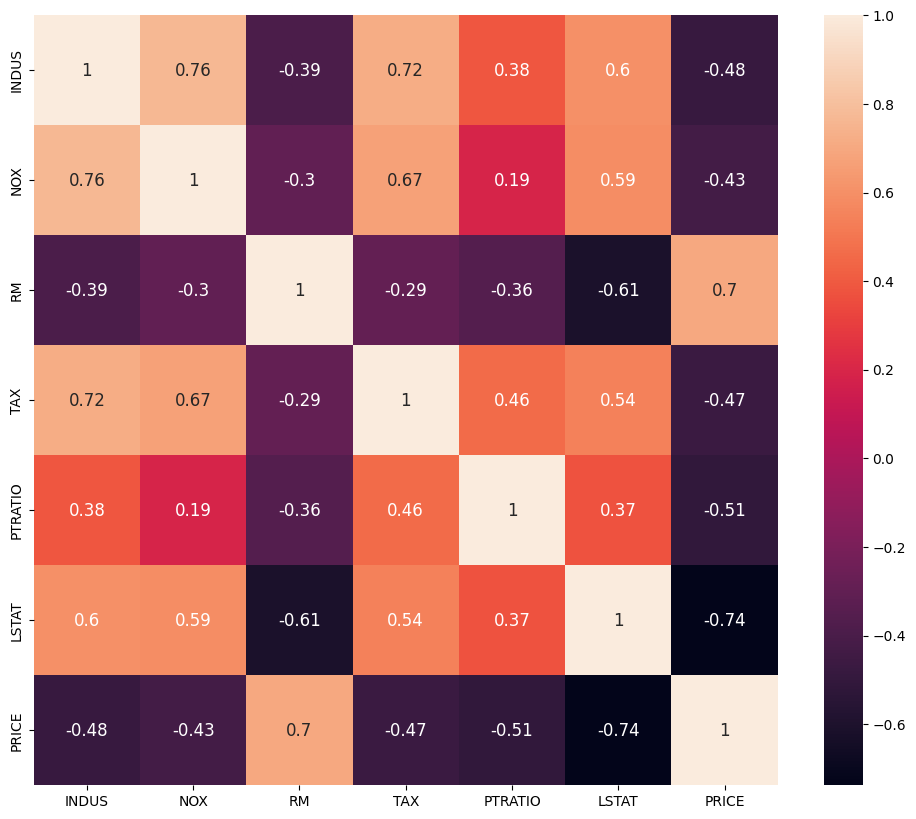

['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'PRICE']
Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')
Shuffle and Split Data
((404, 13), (102, 13))


LinearRegression()

Try model prediction
Try model prediction
    predetti  reali_test
0  22.057837        18.7
1  19.843660        18.5
Plot predizioni


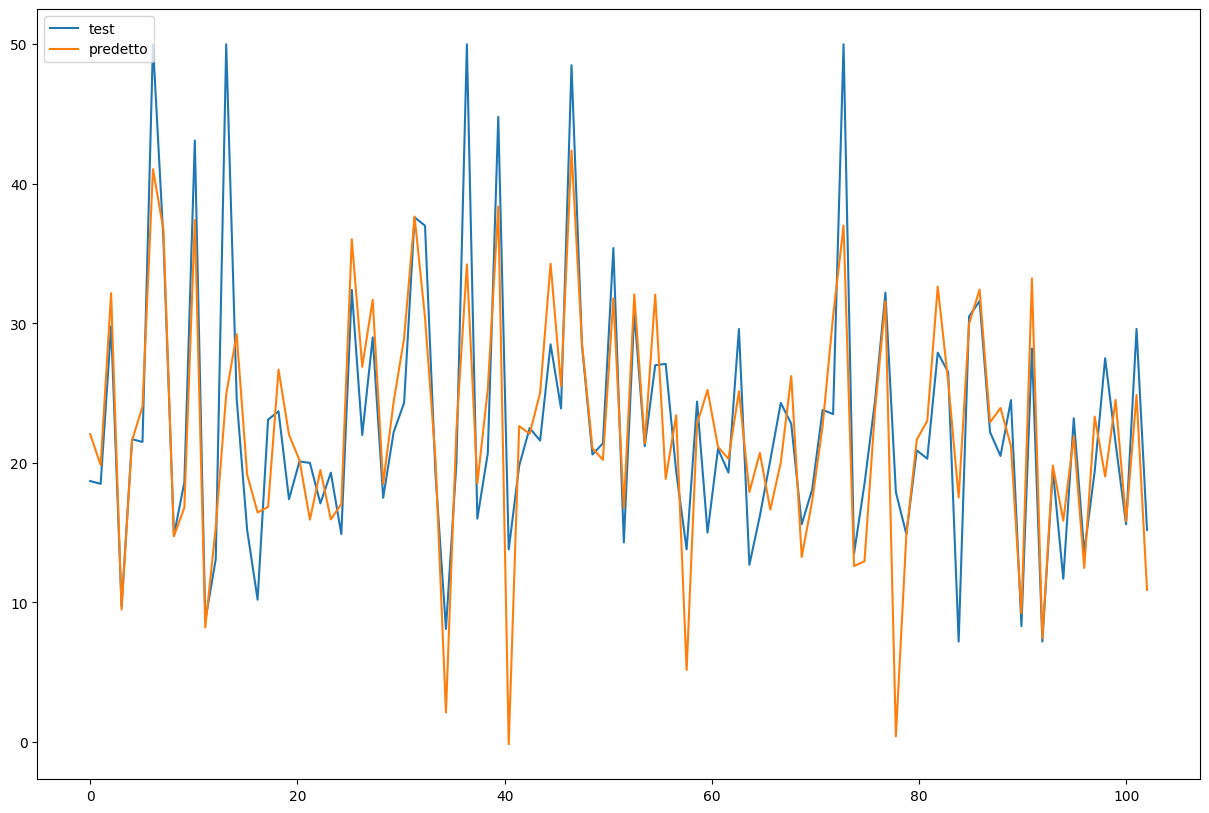

Metriche
STEP5 VERIFICA METRICHE
R2 score 0.6649019242096066
MSE score 29.97513613083122
MAE score 3.7589739818951884
RMSE score 5.474955354231779
Adjusted_R2_score:  0.6153987993769348
R2 score 0.6649019242096066
MSE score 29.97513613083122
MAE score 3.7589739818951884
RMSE score 5.474955354231779
Adjusted_R2_score:  0.6153987993769348
Performance Metrics
                                       features name #feature corr_value  \
0  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' '...       13        0.0   
1  ['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...        6       0.39   

     R2 R2_adjusted   MAE    MSE  RMSE  
0  0.61        0.57  3.68  34.49  5.87  
1  0.66        0.62  3.76  29.98  5.47  


In [5]:
# Prendi la colonna PRICE del dataframe data, applica la treshold e includi in questo dataframe le features
threshold = 0.39
corr_value = get_correlated_feature(df , corrmat['PRICE'], threshold)


print('Shuffle and Split Data')
from sklearn.model_selection import train_test_split # rempre sempre
from sklearn.linear_model import LinearRegression  # problema di regressione
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667 )
print((X_train.shape, X_test.shape))

model = LinearRegression()
from IPython.display import display

display(model.fit(X_train, y_train))

print('Try model prediction')
y_pred = model.predict(X_test)


print('Try model prediction')
df_app = pd.DataFrame(data = [y_pred, y_test])
df_app = df_app.T
df_app.columns = ['predetti', 'reali_test']
print(df_app.head(preview_window))


print('Plot predizioni')
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);
plt.show()


print('Metriche')

from sklearn.metrics import r2_score

print('STEP5 VERIFICA METRICHE')
verifica_metriche(y_test,y_pred)
performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)

### Let's find out other combination of columns to get better accuracy  > 0.45

               INDUS       RM       TAX   PTRATIO     LSTAT  PRICE
Corr Value -0.483725  0.69536 -0.468536 -0.507787 -0.737663    1.0
['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'PRICE']
   INDUS     RM  TAX  PTRATIO  LSTAT  PRICE
0   2.31  6.575  296     15.3   4.98   24.0
1   7.07  6.421  242     17.8   9.14   21.6
(506, 6)
Correlation analisys


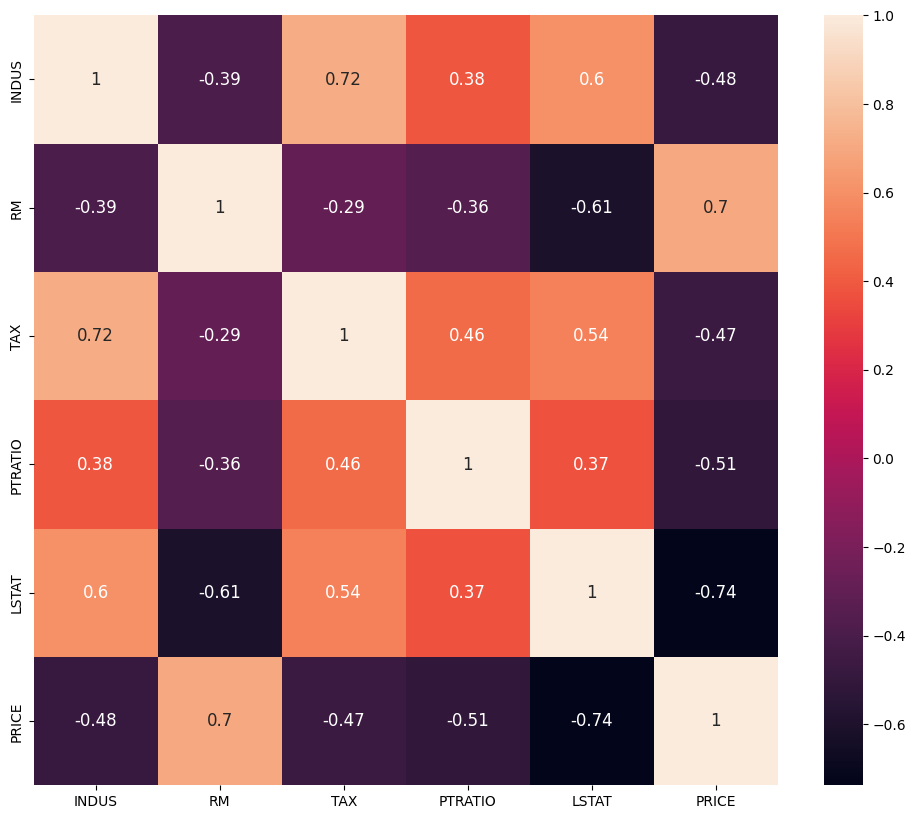

['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'PRICE']
Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')
             0        1        2        3        4       5        6    \
INDUS      2.310    7.070    7.070    2.180    2.180    2.18    7.870   
RM         6.575    6.421    7.185    6.998    7.147    6.43    6.012   
TAX      296.000  242.000  242.000  222.000  222.000  222.00  311.000   
PTRATIO   15.300   17.800   17.800   18.700   18.700   18.70   15.200   
LSTAT      4.980    9.140    4.030    2.940    5.330    5.21   12.430   
PRICE     24.000   21.600   34.700   33.400   36.200   28.70   22.900   

             7        8        9    ...     496      497      498      499  \
INDUS      7.870    7.870    7.870  ...    9.69    9.690    9.690    9.690   
RM         6.172    5.631    6.004  ...    5.39    5.794    6.019    5.569   
TAX      311.000  311.000  311.000  ...  391.00  391.000  391.000  391.000   
PTRATIO   15.200   15.200   15.200  ...   19.20   19.2

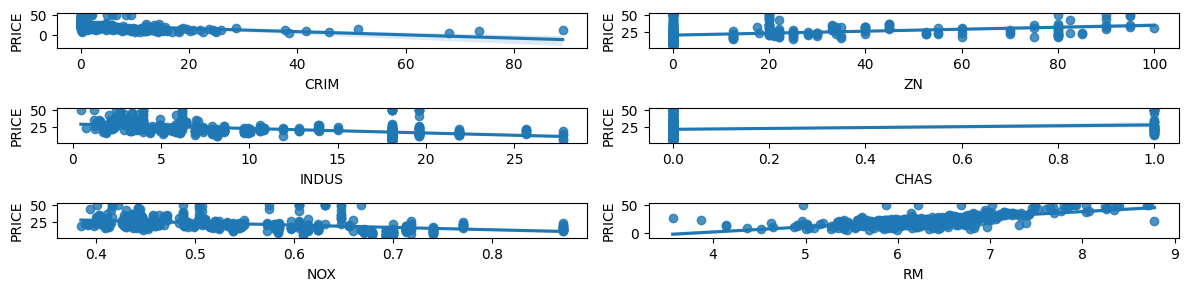

In [6]:
threshold = 0.45
corr_value = get_correlated_feature(df , corrmat['PRICE'], threshold)
print(corr_value.T)

performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)

print('regression plot of the features correlated with the PRICE')

plot_45_correlated_data()

### Let's find out other combination of columns to get better accuracy >50%

                 RM   PTRATIO     LSTAT  PRICE
Corr Value  0.69536 -0.507787 -0.737663    1.0
['RM' 'PTRATIO' 'LSTAT' 'PRICE']
      RM  PTRATIO  LSTAT  PRICE
0  6.575     15.3   4.98   24.0
1  6.421     17.8   9.14   21.6
(506, 4)
Correlation analisys


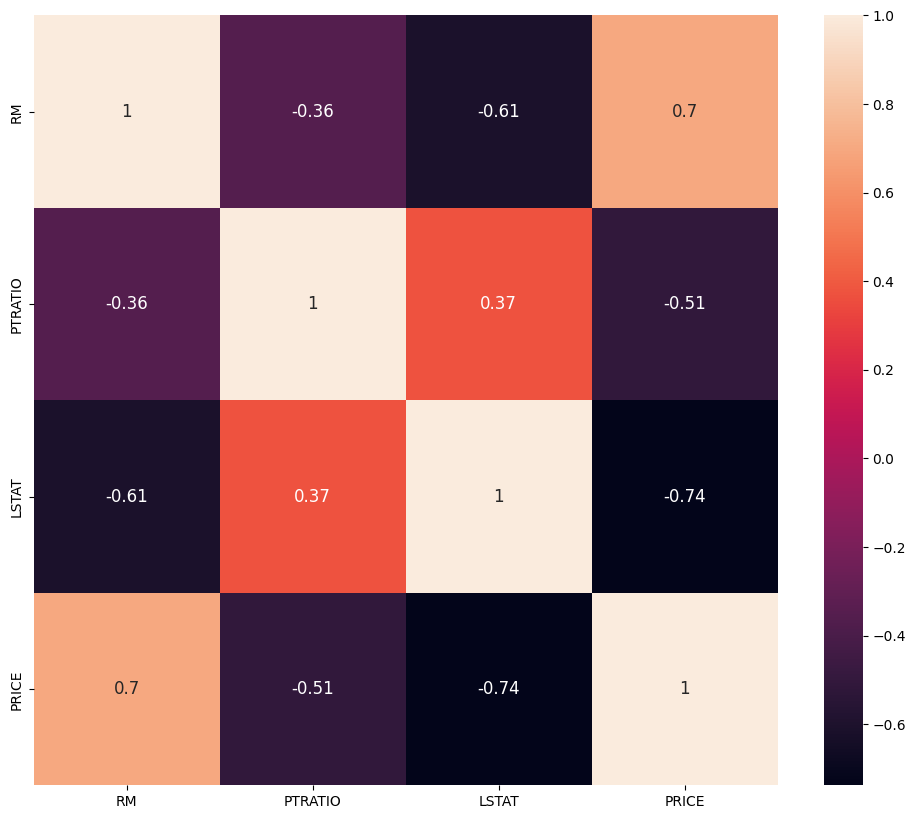

['RM' 'PTRATIO' 'LSTAT' 'PRICE']
Index(['RM', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')
            0       1       2       3       4      5       6       7    \
RM        6.575   6.421   7.185   6.998   7.147   6.43   6.012   6.172   
PTRATIO  15.300  17.800  17.800  18.700  18.700  18.70  15.200  15.200   
LSTAT     4.980   9.140   4.030   2.940   5.330   5.21  12.430  19.150   
PRICE    24.000  21.600  34.700  33.400  36.200  28.70  22.900  27.100   

            8       9    ...    496     497     498     499     500     501  \
RM        5.631   6.004  ...   5.39   5.794   6.019   5.569   6.027   6.593   
PTRATIO  15.200  15.200  ...  19.20  19.200  19.200  19.200  19.200  21.000   
LSTAT    29.930  17.100  ...  21.14  14.100  12.920  15.100  14.330   9.670   
PRICE    16.500  18.900  ...  19.70  18.300  21.200  17.500  16.800  22.400   

           502     503     504    505  
RM        6.12   6.976   6.794   6.03  
PTRATIO  21.00  21.000  21.000  21.00  
LSTAT     9.08   5.64

In [7]:
threshold = 0.50
corr_value = get_correlated_feature(df , corrmat['PRICE'], threshold)
print(corr_value.T)

print(corr_value.head(preview_window))

y_pred,y_test = get_y_predict(corr_value)

performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)


### Let's find out other combination of columns to get better accuracy  >60%

                 RM     LSTAT  PRICE
Corr Value  0.69536 -0.737663    1.0
['RM' 'LSTAT' 'PRICE']
      RM  LSTAT  PRICE
0  6.575   4.98   24.0
1  6.421   9.14   21.6
(506, 3)
Correlation analisys


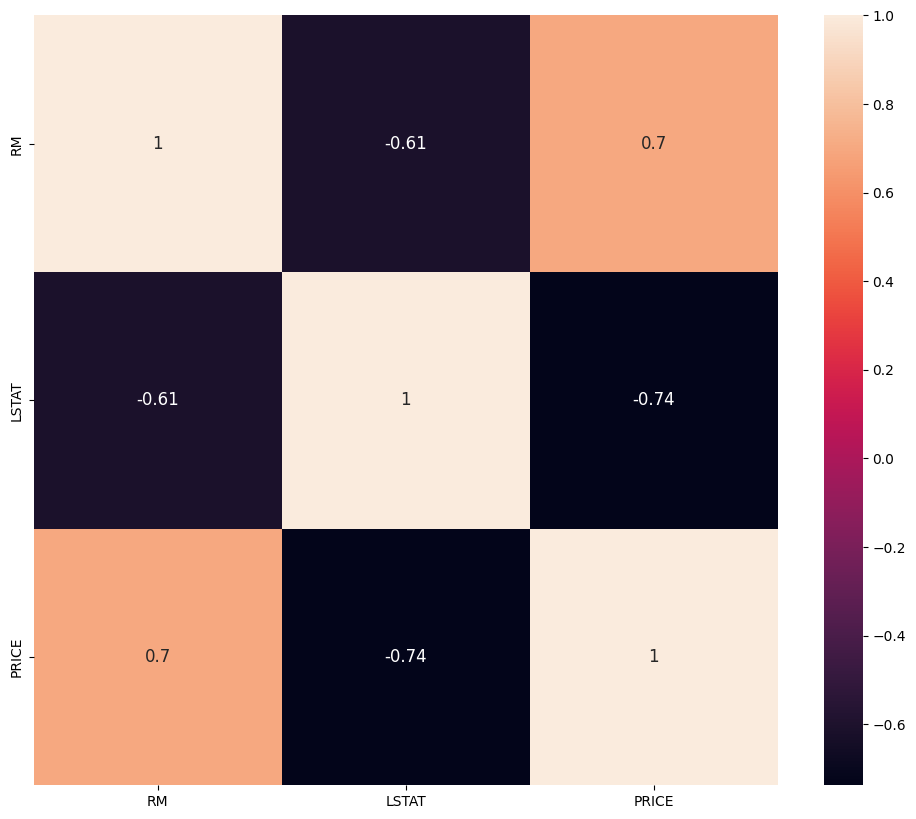

['RM' 'LSTAT' 'PRICE']
Index(['RM', 'LSTAT', 'PRICE'], dtype='object')
          0       1       2       3       4      5       6       7       8    \
RM      6.575   6.421   7.185   6.998   7.147   6.43   6.012   6.172   5.631   
LSTAT   4.980   9.140   4.030   2.940   5.330   5.21  12.430  19.150  29.930   
PRICE  24.000  21.600  34.700  33.400  36.200  28.70  22.900  27.100  16.500   

          9    ...    496     497     498     499     500     501    502  \
RM      6.004  ...   5.39   5.794   6.019   5.569   6.027   6.593   6.12   
LSTAT  17.100  ...  21.14  14.100  12.920  15.100  14.330   9.670   9.08   
PRICE  18.900  ...  19.70  18.300  21.200  17.500  16.800  22.400  20.60   

          503     504    505  
RM      6.976   6.794   6.03  
LSTAT   5.640   6.480   7.88  
PRICE  23.900  22.000  11.90  

[3 rows x 506 columns]
      RM  LSTAT  PRICE
0  6.575   4.98   24.0
1  6.421   9.14   21.6
R2 score 0.5519106133526467
MSE score 40.0824156684702
MAE score 4.433744248593101
RMS

In [8]:
threshold = 0.60
corr_value = get_correlated_feature(df , corrmat['PRICE'], threshold)
print(corr_value.T)

print(corr_value.head(preview_window))

y_pred,y_test = get_y_predict(corr_value)

performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)


### Let's find out other combination of columns to get better accuracy >70%

               LSTAT  PRICE
Corr Value -0.737663    1.0
['LSTAT' 'PRICE']
   LSTAT  PRICE
0   4.98   24.0
1   9.14   21.6
(506, 2)
Correlation analisys


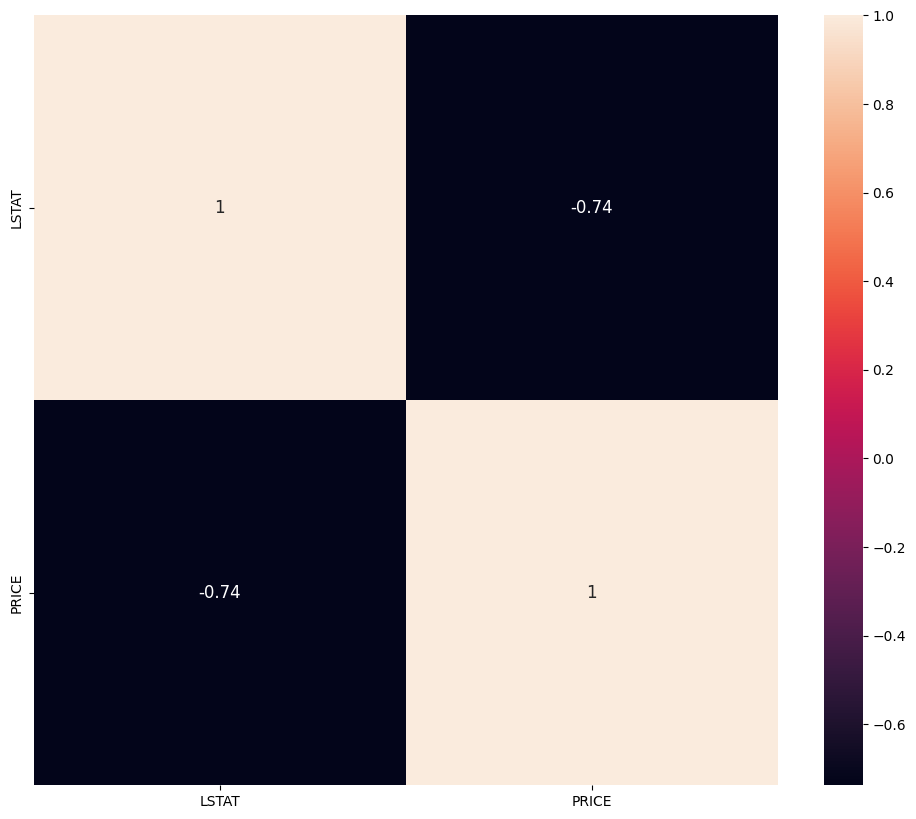

['LSTAT' 'PRICE']
Index(['LSTAT', 'PRICE'], dtype='object')
         0      1      2      3      4      5      6      7      8     9    \
LSTAT   4.98   9.14   4.03   2.94   5.33   5.21  12.43  19.15  29.93  17.1   
PRICE  24.00  21.60  34.70  33.40  36.20  28.70  22.90  27.10  16.50  18.9   

       ...    496   497    498   499    500    501    502    503    504    505  
LSTAT  ...  21.14  14.1  12.92  15.1  14.33   9.67   9.08   5.64   6.48   7.88  
PRICE  ...  19.70  18.3  21.20  17.5  16.80  22.40  20.60  23.90  22.00  11.90  

[2 rows x 506 columns]
   LSTAT  PRICE
0   4.98   24.0
1   9.14   21.6
R2 score 0.46237835973079056
MSE score 48.09123960482114
MAE score 4.93324269221869
RMSE score 6.934784755478798
Adjusted_R2_score:  0.38295698105465725
Performance Metrics
                                       features name #feature corr_value  \
0  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' '...       13        0.0   
1  ['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...        6    

In [9]:
threshold = 0.70
corr_value = get_correlated_feature(df , corrmat['PRICE'], threshold)
print(corr_value.T)

print(corr_value.head(preview_window))

y_pred,y_test = get_y_predict(corr_value)

performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)

In [10]:
#y' = b0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5

In [11]:
## Best R2_adjusted is with 3 features: 'RM' 'PTRATIO' 'LSTAT'

# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

In [12]:
## Deprecata
# model = LinearRegression(normalize=True)
# model.fit(X_train, y_train)

## Cross Validation

In [13]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png',width=600,height=300)

In [15]:
df = pd.read_csv("03-boston_houses.csv")
## fix the rename with inplace
#data.rename(columns={'oldName1': 'newName1'}, inplace=True)
df.rename(columns={'MEDV': 'PRICE'}, inplace=True) #preview
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.score(X_test, y_test) #R^2

0.6113097827490284

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5 , scoring='r2')
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [21]:
np.mean(scores) # porzione dei datappoint è strategica (dato negativo) proprio per natura del dataset

0.353275924395878

In [22]:
# quando le prediction sono molto distanti 

In [ ]:
# cosa ci lascia?

# esercizio:
